# TAF MCE - UE Machine Learning
## Bayesian Classification & Gaussian Mixture Models

Authors: 

[lucas.drumetz@imt-atlantique.fr](lucas.drumetz@imt-atlantique.fr), [francois.rousseau@imt-atlantique.fr](francois.rousseau@imt-atlantique.fr), [carlos.granero-belinchon@imt-atlantique.fr](carlos.granero-belinchon@imt-atlantique.fr),[frederic.maussang@imt-atlantique.fr](simon.benaichouche@imt-atlantique.fr)

Year: 2020-2021

# Supervised classification with Linear and Quadratic Discriminant Analysis on toy datasets

The goal of this part of the project is to implement and test the Linear and Quadratic classification algorithms obtained by assuming Gaussian distributed data. These supervised classification algorithms will be tested on several toy datasets. We will make use of the sci-kit learn package, which is standard for machine learning in python.

In [3]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

First, we generate a 2D toy dataset consisting in gaussian distributed datasets with three classes, using the make_blobs function from sci-kit learn. 

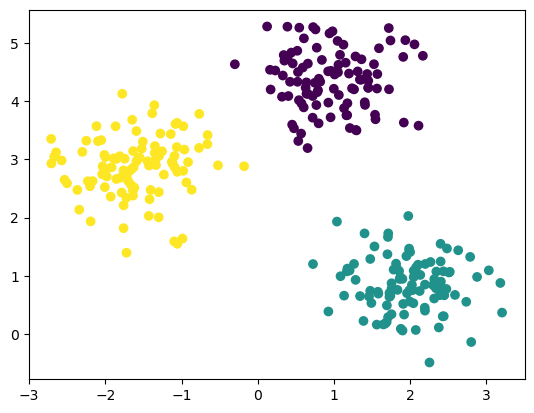

In [4]:
nb_classes = 3
n_samples = 100

X, labels = make_blobs(n_samples=[n_samples, n_samples, n_samples], cluster_std= [0.5,0.5,0.5],\
                       centers=None, n_features=2, random_state = 0)
# example of scatterplot of the generated data

plt.figure()
plt.scatter(X[:,0],X[:,1], c = labels); # we use the labels to color the points

We define a train/test split by using the train_test_split function. We use two thirds of the data for training, and the rest for testing

In [5]:
# define training/test split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33)


Code the LDA classification algorithm, first assuming that the classes all have identity covariance. In this case, the algorithm reduces to a nearest-mean classifier, i.e. each point is affected to the class whose mean is the closest in terms of the Euclidean distance:

\begin{equation*}
\underset{k}{\textrm{arg min}} \ ||\mathbf{x}_{n} - \boldsymbol{\mu}_{k}||_{2}^{2}
\end{equation*}

The mean $\boldsymbol{\mu}_{k}$ for each class has to be estimated from the data.

In [6]:
def LDA_classifier_train(training_data,training_labels,nb_classes):
    class_means = []
    for class_label in np.unique(training_labels):
        class_means.append(np.mean(training_data[training_labels == class_label], axis=0))
    return class_means # this function returns the mean vector for each class

def LDA_classifier_predict(test_data,class_means,nb_classes):
    predicted_labels = []
    for element in test_data:
        class_label = np.argmin(
            [np.linalg.norm(element - class_means[i], axis=0) for i in range(nb_classes)])
        predicted_labels.append(class_label)
    return predicted_labels # this function classifies each point in the test set by affecting it to the
    # class corresponding to the closest centroid

class_means = LDA_classifier_train(X_train,y_train,nb_classes)
print(class_means)
print(LDA_classifier_predict(X_test,class_means,nb_classes))


[array([0.88608306, 4.34457081]), array([1.98618708, 0.88270483]), array([-1.57949631,  2.93576913])]
[2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 1]


4) Code a function to show the decision boundary for any model applied on any dataset

Tips: you have to define a grid of data points enclosing your data, on which you will apply your classifier. You can use the function np.linspace to generate the extent of the grid in x and y, and the function meshgrid to define a grid of points from those two vectors.

Then you need to apply your classifier on each of those grid points.

You can then display some contour lines of the generated function using the plt.contourf function.

A nice thing to do is to overlay this plot with a scatterplot of the data.


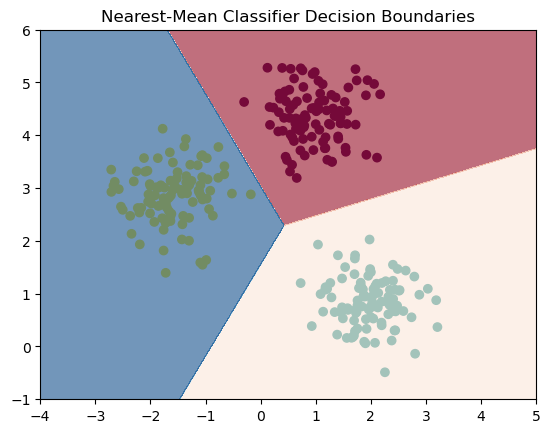

In [7]:
grid_size = 1000

x = np.linspace(-4,5,grid_size) # extent of the grid on the x axis
y = np.linspace(-1,6,grid_size) # extent of the grid on the y axis

def plot_decision_boundary(x,y,X,labels,class_means, classifier):
    xx, yy = np.meshgrid(x, y)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Apply the classifier to each point on the grid
    grid_predictions = np.array(classifier(grid_points,class_means,nb_classes))
    grid_predictions = grid_predictions.reshape(grid_size,grid_size)

    # Scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=labels)

    # Plot decision boundaries
    plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.RdBu, alpha=0.6)

    # Set plot labels and title
    plt.title('Nearest-Mean Classifier Decision Boundaries')
    
# an example of use of the function
class_means = LDA_classifier_train(X_train,y_train,nb_classes)
plot_decision_boundary(x,y,X,labels,class_means,LDA_classifier_predict)


Code a function providing the classification accuracy on the test and train sets, again for any classifier.

In [8]:
# train and test accuracy

def train_test_accuracy(X_train,y_train,X_test,y_test, class_means, classifier):
    # Make predictions on the training and test data
    y_train_pred = classifier(X_train,class_means,nb_classes)
    y_test_pred = classifier(X_test,class_means,nb_classes)
    
    # Calculate accuracy on the training and test sets
    training_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return training_accuracy, test_accuracy

training_accuracy, test_accuracy = \
    train_test_accuracy(X_train,y_train,X_test,y_test,class_means,LDA_classifier_predict)

print(training_accuracy)
print(test_accuracy)

1.0
1.0


Now we switch to a different dataset. We are still generating Gaussian distributed data, except that this time their covariance matrix, while still being the same for all classes, is not the identity.

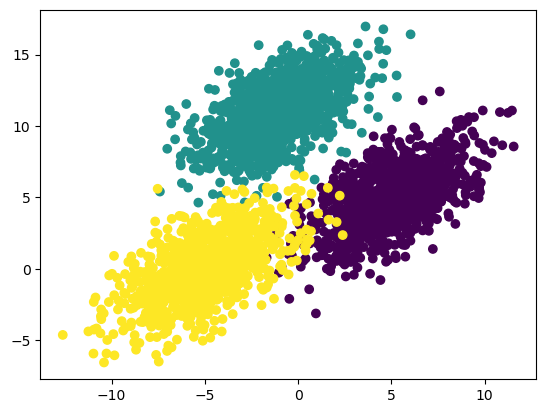

In [9]:
# change dataset so that covariance matrices become necessary

covariance_matrix = [[5,3],[3,5]]
nb_samples = 1000

X_class_1 = sp.stats.multivariate_normal.rvs(mean=[5,5], cov=covariance_matrix, size=nb_samples)
X_class_2 = sp.stats.multivariate_normal.rvs(mean=[-1,11], cov=covariance_matrix, size=nb_samples)
X_class_3 = sp.stats.multivariate_normal.rvs(mean=[-5,0], cov=covariance_matrix, size=nb_samples)

X = np.concatenate((X_class_1, X_class_2,X_class_3),axis = 0)

labels = np.concatenate([np.zeros(nb_samples), np.ones(nb_samples),2*np.ones(nb_samples)],0)

plt.figure()
plt.scatter(X[:,0],X[:,1],c = labels) 

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33)

Test the nearest mean classifier that you coded above. Show the decision boundaries and print the training and test accuracies. Does the classifier work on this dataset? Why?

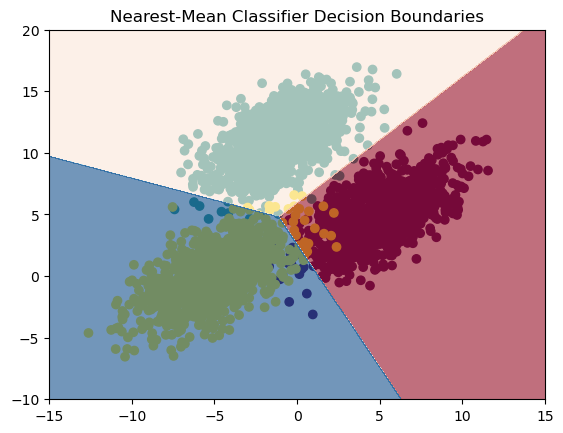

In [10]:

class_means = LDA_classifier_train(X_train,y_train,nb_classes)
x = np.linspace(-15,15,grid_size) # extent of the grid on the x axis
y = np.linspace(-10,20,grid_size) # extent of the grid on the y axis
plot_decision_boundary(x,y,X,labels,class_means,LDA_classifier_predict)

Code the LDA with a non-unit covariance matrix. Now, the classifier is still a nearest mean classifier, but the distance used is now the Mahalanobis distance, i.e. an Euclidean distance weighted by the inverse of the covariance matrix of the data:

\begin{equation*}
\underset{k}{\textrm{arg min}} \ ||\mathbf{x}_{n} - \boldsymbol{\mu}_{k}||_{\boldsymbol{\Sigma}^{-1}}^{2} = \underset{k}{\textrm{arg min}}  \ (\mathbf{x}_{n} - \boldsymbol{\mu}_{k})^{\top}\boldsymbol{\Sigma^{-1}} (\mathbf{x}_{n} - \boldsymbol{\mu}_{k})
\end{equation*}

Show the decision boundaries and the accuracies.

In [14]:
# Nearest-mean classifier using Mahalanobis distance
def mahalanobis_distance(x, mean, cov):
    diff = x - mean
    cov_inverse = np.linalg.inv(cov)
    return np.dot(diff, np.dot(cov_inverse, diff))

# LDA taking into account covariances
def LDA_classifier_train_cov(training_data,training_labels,nb_classes):
    class_means = []
    cov = []
    for class_label in np.unique(training_labels):
        class_means.append(np.mean(training_data[training_labels == class_label], axis=0))
        cov.append(np.cov(training_data[training_labels == class_label].T))
    return class_means, cov # this function returns the mean vector for each class, and the estimated covariance

def LDA_classifier_predict_cov(test_data,class_means,cov,nb_classes):
    predicted_labels = []
    for element in test_data:
        class_label = np.argmin(
            [mahalanobis_distance(element, mean, cov_classe) for mean, cov_classe in zip(class_means, cov)])
        predicted_labels.append(class_label)
    return predicted_labels # this function classifies each point in the test set by affecting it to the
    # class corresponding to the closest centroid in terms of the Mahalanobis distance (L2 norm weighted by the
    # inverse of the estimated covariance matrix)



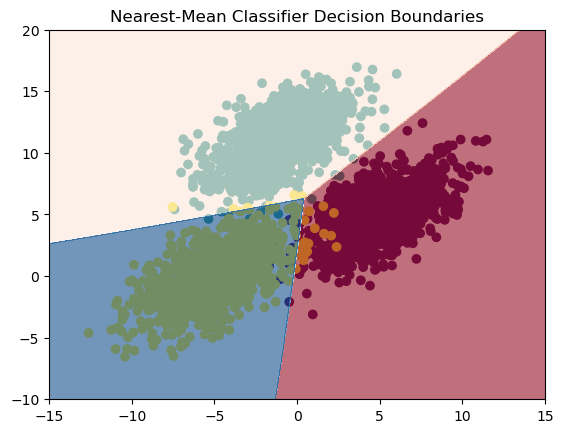

In [15]:
# To show the decision boundaries and compute the training and test accuracies, you need the same functions as
# before, except that you need to pass them an additional parameter, the estimated covariance matrix.
def plot_decision_boundary_with_cov(x,y,X,labels,class_means, cov, classifier):
    xx, yy = np.meshgrid(x, y)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    # Apply the classifier to each point on the grid
    grid_predictions = np.array(classifier(grid_points,class_means, cov, nb_classes))
    grid_predictions = grid_predictions.reshape(grid_size,grid_size)

    # Scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=labels)

    # Plot decision boundaries
    plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.RdBu, alpha=0.6)

    # Set plot labels and title
    plt.title('Nearest-Mean Classifier Decision Boundaries')

class_means, cov = LDA_classifier_train_cov(X_train,y_train,nb_classes)
plot_decision_boundary_with_cov(x,y,X,labels,class_means, cov, LDA_classifier_predict_cov)


We use yet another dataset, made of Gaussian blobs with identical means, but different covariances. 

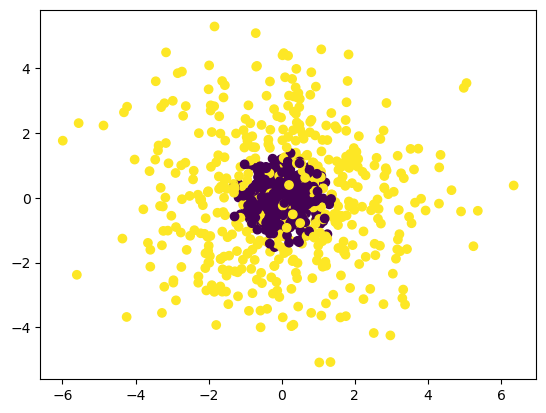

In [16]:
# Concentric circles

nb_samples = 500

X, labels = make_blobs(n_samples=[nb_samples, nb_samples], cluster_std= [0.5,2], centers=[[0,0],[0,0]], n_features=2, \
                  random_state = 0)

nb_classes = 2

plt.figure
plt.scatter(X[:,0],X[:,1], c = labels)


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33)

Test the different variants of LDAs on this dataset and conclude on their performance.

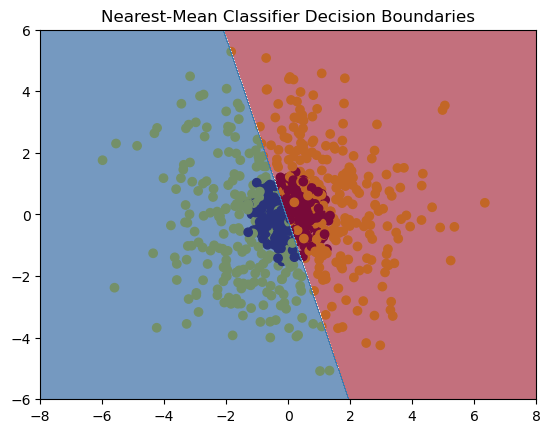

In [18]:
# Unit covariance LDA
x = np.linspace(-8,8,grid_size) # extent of the grid on the x axis
y = np.linspace(-6, 6,grid_size) # extent of the grid on the y axis
class_means = LDA_classifier_train(X_train,y_train,nb_classes)
plot_decision_boundary(x,y,X,labels,class_means,LDA_classifier_predict)

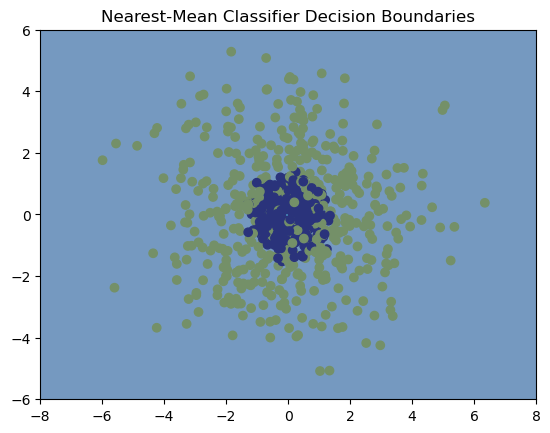

In [19]:
# same but not unit covariance LDA

# TO DO
class_means, cov = LDA_classifier_train_cov(X_train,y_train,nb_classes)
plot_decision_boundary_with_cov(x,y,X,labels,class_means, cov, LDA_classifier_predict_cov)

Implement the Gaussian QDA. This time you need to explicitly compute the posterior probabilities (multivariate Gaussians) for each class and take the maximum to make a decision for one data point. The log posterior densities are given by:

\begin{equation*}
\textrm{ln} \ p(\mathcal{C}_{k}|\mathbf{x}) = g_{k}(\mathbf{x}) = -\frac{1}{2} (\mathbf{x}_{n} - \boldsymbol{\mu}_{k})^{\top}\boldsymbol{\Sigma_{k}^{-1}} (\mathbf{x}_{n} - \boldsymbol{\mu}_{k}) - \frac{1}{2} \log \det (\boldsymbol{\Sigma}_{k}) + \textrm{cst} 
\end{equation*}

Test it on the dataset and conclude.

In [23]:
# Gaussian QDA
def discriminant(x, mean, cov):
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    log_det = np.log(np.linalg.det(cov))
    result = (-1/2) * np.dot(diff.T, np.dot(inv_cov, diff)) - 1/2 * log_det
    return result

def QDA_classifier_train(training_data,training_labels,nb_classes):
    class_means = []
    cov = []
    for class_label in np.unique(training_labels):
        class_means.append(np.mean(training_data[training_labels == class_label], axis=0))
        cov.append(np.cov(training_data[training_labels == class_label].T))
    # Now we need to estimate a different covariance for each class (you can store them all in a 3-way array)
    return class_means, cov

def QDA_classifier_predict(test_data,class_means,cov, nb_classes):
    predicted_labels = []
    for point in test_data:
        discriminants = [discriminant(point, class_means[k], cov[k]) for k in range(len(class_means))]
        label = np.argmax(np.array(discriminants))
        predicted_labels.append(label)
    # The discriminant functions have to be computed for each class, and then just take the max for each point
    return predicted_labels

nb_classes = 2

class_means, cov = QDA_classifier_train(X_train, y_train,nb_classes)

predicted_labels = QDA_classifier_predict(X_test,class_means,cov, nb_classes)


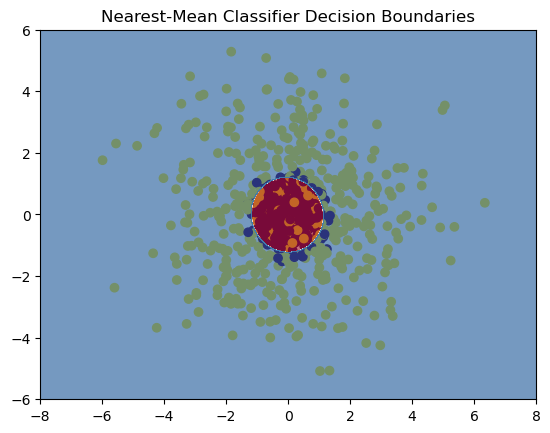

In [24]:
# Show decision boundaries and train/test accuracies
plot_decision_boundary_with_cov(x,y,X,labels,class_means,cov,QDA_classifier_predict)

Finally, we are using a custom dataset made of three parabolas, each making a different class.

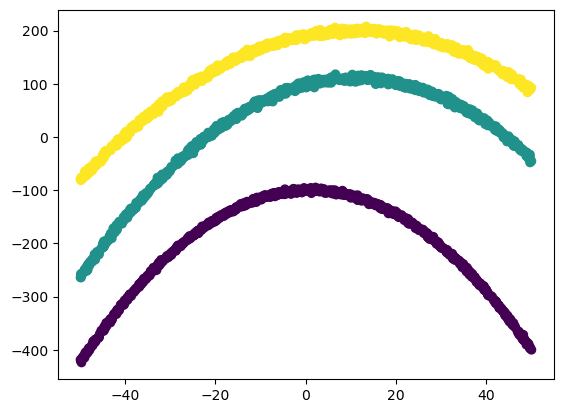

In [25]:
# custom nonlinear dataset using parabolas

nb_samples = 1000

# Generate data
x = -50 + np.random.rand(nb_samples, 1)*100 # x coordinate for the new data points

factor = 0.5

y_1 = -100 + 0.5*(factor*x) - 0.5*(factor*x)**2 + np.random.randn(nb_samples, 1)*2 # add noise to the truth
y_2 = 110 + 0.5*((factor*x)-5) - 0.4*((factor*x)-5)**2 + np.random.randn(nb_samples, 1)*3
y_3 = 200 + 0.4*((factor*x)-5) - 0.3*((factor*x)-5)**2 + np.random.randn(nb_samples, 1)*3

X_class_1 = np.concatenate((x,y_1),axis = 1)
X_class_2 = np.concatenate((x,y_2),axis = 1)
X_class_3 = np.concatenate((x,y_3),axis = 1)

X = np.concatenate((X_class_1, X_class_2, X_class_3),axis = 0)

labels = np.concatenate([np.zeros(nb_samples), np.ones(nb_samples),2*np.ones(nb_samples)],0)

plt.figure()
plt.scatter(X[:,0],X[:,1],c = labels)

X_train, X_test, y_train, y_test = train_test_split(X,labels,  test_size=0.33)

We test the QDA on this dataset. Make sure you visualize the nonlinear decision boundaries. Why doesn't it work in spite of being a nonlinear classifier?

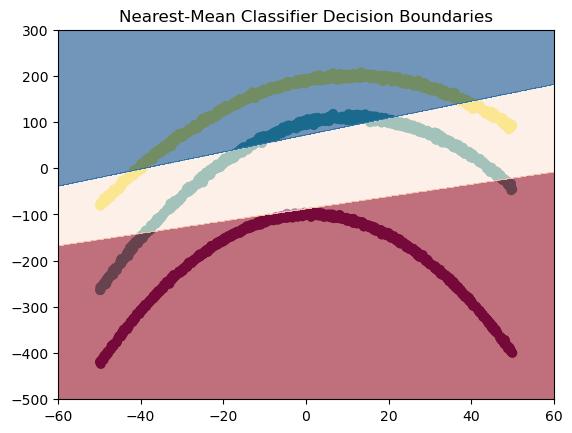

In [27]:
# Show decision boundaries and train/test accuracies

nb_classes = 3

class_means, cov = QDA_classifier_train(X_train, y_train,nb_classes)

predicted_labels = QDA_classifier_predict(X_test,class_means,cov, nb_classes)

x = np.linspace(-60,60,grid_size) # extent of the grid on the x axis
y = np.linspace(-500, 300,grid_size) # extent of the grid on the y axis

plot_decision_boundary_with_cov(x,y,X,labels,class_means,cov,QDA_classifier_predict)

The QDA doesn't work well in this case because the points of the parabolas are not symetrical around the mean and so it's not the best way to assume that the distributions are gaussians (which is the assumption behind a QDA algorithm). 

You will see in the ML course later tha simple nonparametric methods, e.g. K-nearest neighbor classification (KNN), are more suited to this problem than LDA/QDA. Other techniques modifiying the representation of the data, e.g. kernel methods or Neural networks would work fine as well.

 # Unsupervised classification (clustering) with a Gaussian Mixture Model on a real dataset
 
 In this second part, we apply Gaussian Mixture models to a hyperspectral image. Hyperspectral images are multivariate images where each pixel represents a full spectrum of the reflectance responses in a large number of wavelengths of the electromagnetic spectrum (up to a few hundreds), usually in the visible and near infrared domains. In contrast, aclassical RGB image only has three values for each pixel, corresponding to the red, green and blue wavelengths.
 
The image you will use was acquired in 2012 above the campus of The university of Houston, Texas, USA. It has a spatial resolution of 1m, and 144 spectral bands (wavelengths).  
 
We use GMMs to classify two types of vegetation (grass and trees) in a real world hyperspectral image in an unsupervised way.

First, we load the data, as well as a RGB representation using the appropriate wavelengths. Then we select on pixel in a grass area that will be a reference vegetation spectrum, and we plot it.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


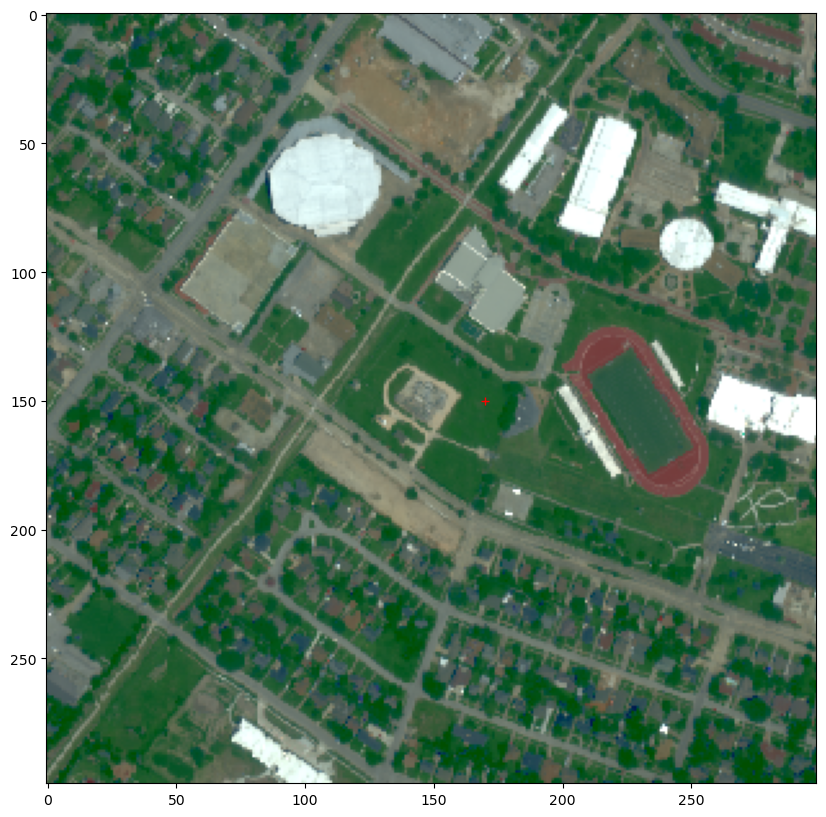

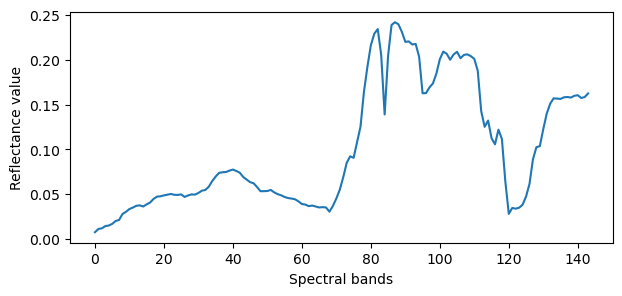

In [4]:
# import data and display rgb composition

import pickle 

data = []
with open('data_GMM.pickle','rb') as f:
        data = pickle.load(f)
    
im = data[0] # This contains the hyperspectral data
rgb = data[1] # This contains a RGB composition of the dataset
mask_vegetation = data[2] # This contains a binary mask indicating where the vegetation pixels are in the image

plt.rcParams["figure.figsize"] = (20,10)
plt.figure()
plt.imshow(rgb)

x = 150
y = 170

reference_vegetation = im[y,x,:]
plt.plot([y],[x], 'r+') # we plot the coordinates of a vegetation pixel that we will use as a reference

plt.rcParams["figure.figsize"] = (7,3)
plt.figure()
plt.plot(reference_vegetation)
plt.xlabel('Spectral bands')
plt.ylabel('Reflectance value');

m,n,L = np.shape(im)

We have already run a simple algorithm to detect the vegetation pixels using the reference. Now, using GMMs, we are going to cluster the vegetation pixels into several subcomponents (in an unsupervised way). We see that there is quite a large variability in the vegetation pixels.

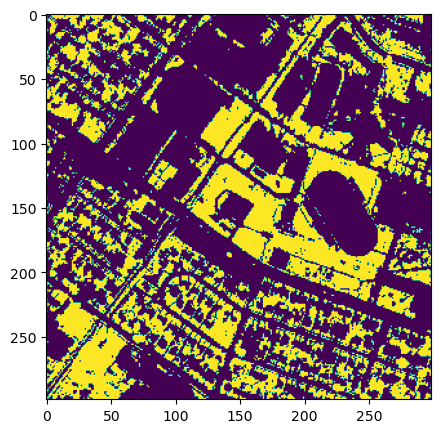

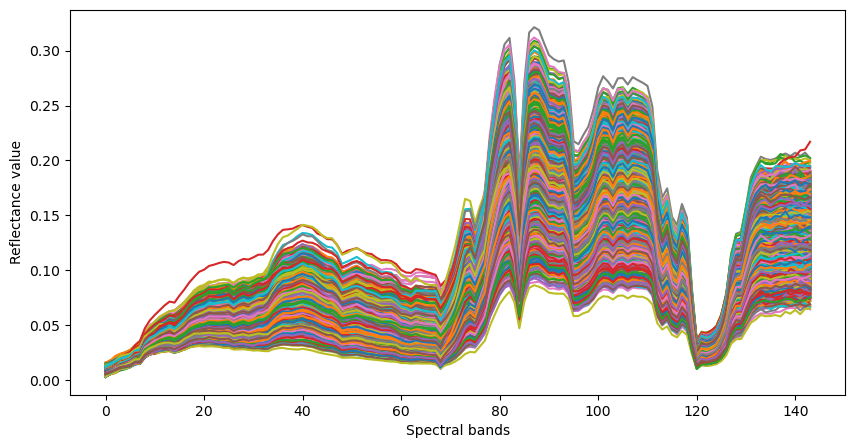

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
plt.figure()
plt.imshow(mask_vegetation)

vegetation_spectra = im[mask_vegetation,:] # we display the binary mask

plt.rcParams["figure.figsize"] = (10,5)
plt.figure()
plt.plot(vegetation_spectra.T) # and plot all the corresponding pixels
plt.xlabel('Spectral bands')
plt.ylabel('Reflectance value');
plt.show()

We could try to model those spectra using a GMM directly, but the high dimension of the data is too large ($d= 144$ spectral bands). So we need to reduce the dimension of the data somehow. A simple but useful model to explain the variations of the vegetation spectra is to consider that the difference between two spectra is a scaling factor, i.e.

\begin{equation}
\exists \psi\in \mathbb{R}^{+*},\mathbf{x}_{1} \approx \psi \mathbf{x}_2
\end{equation}

The spectra are more or less on a line in $\mathbb{R}^{d}$. So, we can use this model to estimate a scaling factor between each vegetation spectrum and our previously extracted reference $\mathbf{x}_{0}$, via a regression:

\begin{equation}
\hat{\psi}_{i} = \underset{\psi_{i}}{arg min} \ ||\mathbf{x}_{0}-\psi_{i} \mathbf{x}_{i}||_{2}^{2}
\end{equation}

You can check that the solution is given by

\begin{equation}
\hat{\psi}_{i} = \frac{\mathbf{x}_{i}^T \mathbf{x}_{0}}{||\mathbf{x}_{0}||_{2}^{2}}
\end{equation}


This way, we have reduced the dimensionality of the variability of the data to just a scalar variable, given by the scaling factor, which is easier to manipulate than high-dimensional data.

Implement the solution to the regression for each vegetation spectrum and compute the histogram of the scaling factors. Does the distribution of scaling factors look unimodal? Can you guess why?

Text(0.5, 0, 'scaling factors')

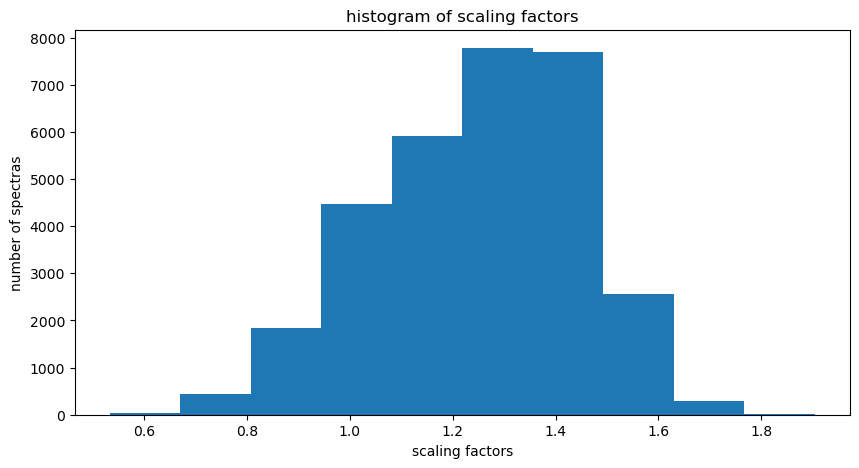

In [31]:
# fit scaling factors and plot histograms of those
scaling_factors = np.array([np.dot(spectra.T,im[y,x,:])/np.linalg.norm(im[y,x,:]) for spectra in vegetation_spectra])
scaling_factors.shape


plt.hist(scaling_factors)
plt.title("histogram of scaling factors")
plt.ylabel("number of spectras")
plt.xlabel("scaling factors")


Using scikit learn https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html , fit a Gaussian Mixture Model to the scaling factors, with the number of components that you think is appropriate. Plot the obtained density and compate to the empirical histogram.

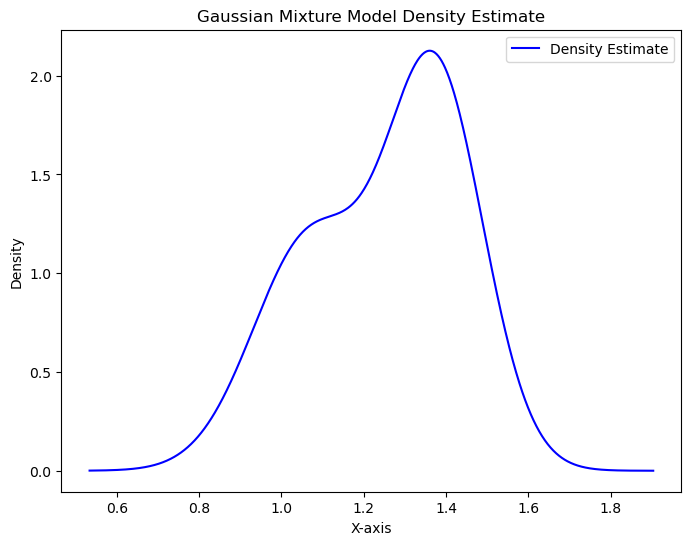

In [37]:
# fit GMM to psis first

from sklearn import mixture

# Create a Gaussian Mixture Model with 8 components
gmm = mixture.GaussianMixture(n_components=2)

# Fit the GMM to your data
gmm.fit(scaling_factors.reshape(-1, 1))  # Reshape the data to have shape (3000, 1)

# Generate a range of x values for the density plot
x = np.linspace(min(scaling_factors), max(scaling_factors), 1000)

# Calculate the density estimates for each x value
density = np.exp(gmm.score_samples(x.reshape(-1, 1)))

# Create a density plot
plt.figure(figsize=(8, 6))
plt.plot(x, density, label='Density Estimate', color='blue')
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('Gaussian Mixture Model Density Estimate')
plt.legend()
plt.show()

Compute the two (weighted) Gaussian components, and overlay them to the previous plot. Also compute the posterior probabilites $p(\mathbf{z}|{\psi}_{i})$ (where $\mathbf{z}$ is the latent variable) for each scaling factor. Represent them as images using the 2D mask of the vegetation pixels. Use them to perform a classification of the vegetation pixels. What does each component represent? Can you explain intuitively why? Are there misclassified pixels and why? 

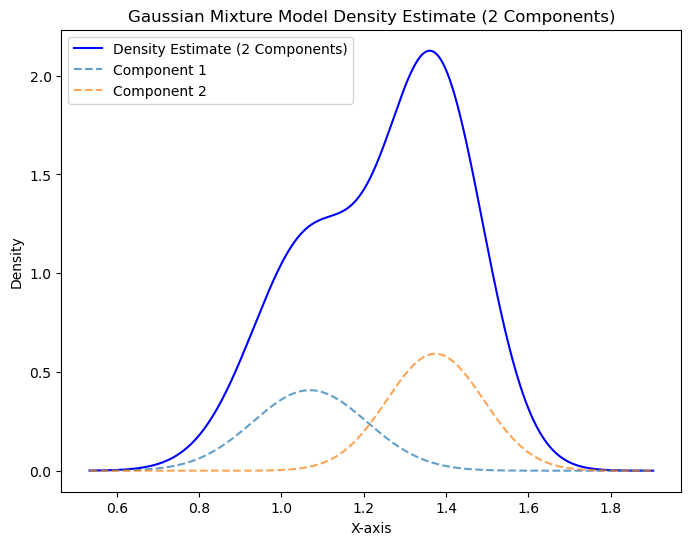

In [42]:
#  plot p(z|x) for each data point (responsibilities)

# Get the parameters of the fitted GMM for 2 components
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

# Create a density plot
plt.figure(figsize=(8, 6))
plt.plot(x, density, label='Density Estimate (2 Components)', color='blue')

# Overlay the two Gaussian components
for i in range(2):
    component_density = weights[i] * np.exp(-(x - means[i]) ** 2 / (2 * covariances[i]))
    plt.plot(x, component_density[0], linestyle='--', label=f'Component {i + 1}', alpha=0.7)

plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('Gaussian Mixture Model Density Estimate (2 Components)')
plt.legend()
plt.show()


In [46]:
posterior_probs = gmm.predict_proba(scaling_factors.reshape(-1, 1))

plt.rcParams["figure.figsize"] = (10,5)
plt.figure()
mask_vegetation.shape


(299, 299)

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Posterior Probability for belonging to component 1')

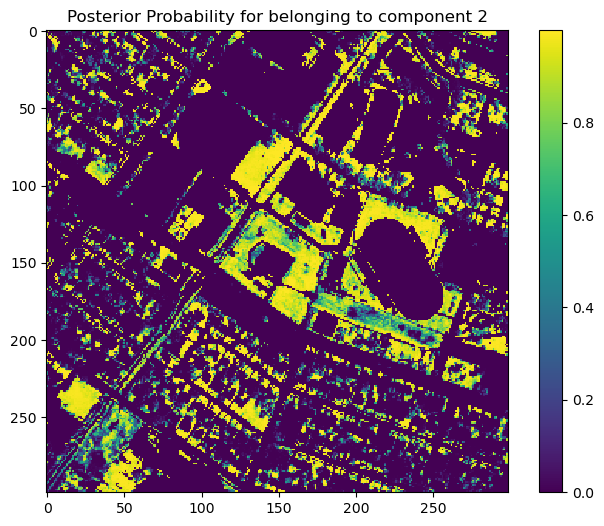

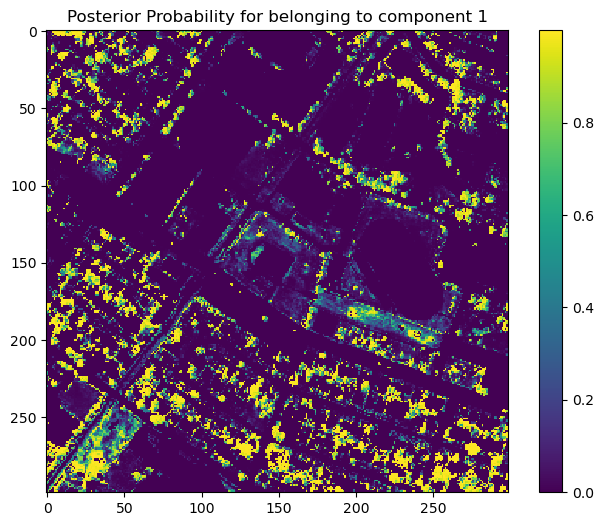

In [48]:
# Create images for the posterior probabilities
posterior_image = np.zeros_like(mask_vegetation, dtype=float)

# Assign posterior probabilities to the corresponding vegetation pixels
for i, prob in enumerate(posterior_probs):
    x, y = np.argwhere(mask_vegetation == True)[i]
    posterior_image[x, y] = prob[1]  # Probability of belonging to component 2

plt.figure(figsize=(8, 6))
plt.imshow(posterior_image, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Posterior Probability for belonging to component 2')

for i, prob in enumerate(posterior_probs):
    x, y = np.argwhere(mask_vegetation == True)[i]
    posterior_image[x, y] = prob[0]  # Probability of belonging to component 1

plt.figure(figsize=(8, 6))
plt.imshow(posterior_image, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Posterior Probability for belonging to component 1')

We can say that component 1 represents trees and component 2 represents grass 

Text(0.5, 1.0, 'GMM Classifier (Trees and grass)')

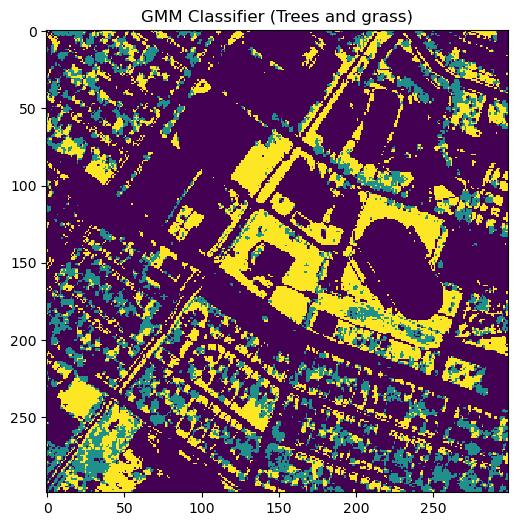

In [57]:
classifier_mask = np.zeros_like(mask_vegetation, dtype=float)
for i, prob in enumerate(posterior_probs):
    x, y = np.argwhere(mask_vegetation == True)[i]
    component = np.argmax(prob)
    classifier_mask[x, y] = component + 1


# Display the mask using plt.imshow with the custom colormap
plt.figure(figsize=(8, 6))
plt.imshow(classifier_mask, interpolation='nearest')
plt.title('GMM Classifier (Trees and grass)')
